<a href="https://colab.research.google.com/github/Mitali-laroia/QC-mini-project/blob/main/HGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#########################################################
# ALGORITHM PARAMETERS                                  #
#########################################################
N=50                  # Define here the population size
Genome=4              # Define here the chromosome length
generation_max= 650   # Define here the maximum number of
                      # generations/iterations

In [3]:
#########################################################
# VARIABLES ALGORITHM                                   #
#########################################################
popSize=N+1
genomeLength=Genome+1
top_bottom=3
QuBitZero = np.array([[1], [0]])
QuBitOne = np.array([[0], [1]])
AlphaBeta = np.empty([top_bottom])
fitness = np.empty([popSize]) 
probability = np.empty([popSize])
# qpv: quantum chromosome (or population vector, QPV)
qpv = np.empty([popSize, genomeLength, top_bottom])         
nqpv = np.empty([popSize, genomeLength, top_bottom]) 
# chromosome: classical chromosome
chromosome = np.empty([popSize, genomeLength],dtype=np.int) 
child1 = np.empty([popSize, genomeLength, top_bottom]) 
child2 = np.empty([popSize, genomeLength, top_bottom]) 
best_chrom = np.empty([generation_max]) 

<ipython-input-3-4cb84f639405>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  chromosome = np.empty([popSize, genomeLength],dtype=np.int)


In [4]:
# Initialization global variables
theta=0;
iteration=0;
the_best_chrom=0;
generation=0;

In [5]:
#########################################################
# QUANTUM POPULATION INITIALIZATION                     #
#########################################################
def Init_population():
    # Hadamard gate
    r2=math.sqrt(2.0)           
    h=np.array([[1/r2, 1/r2],[1/r2,-1/r2]])
    # Rotation Q-gate
    theta=0;
    rot =np.empty([2,2])
    # Initial population array (individual x chromosome)
    i=1; j=1;
    for i in range(1,popSize):
     for j in range(1,genomeLength):
        theta=np.random.uniform(0,1)*90   
        theta=math.radians(theta)
        rot[0,0]=math.cos(theta); rot[0,1]=-math.sin(theta);
        rot[1,0]=math.sin(theta); rot[1,1]=math.cos(theta);
        AlphaBeta[0]=rot[0,0]*(h[0][0]*QuBitZero[0])+rot[0,1]*(h[0][1]*QuBitZero[1])
        AlphaBeta[1]=rot[1,0]*(h[1][0]*QuBitZero[0])+rot[1,1]*(h[1][1]*QuBitZero[1])
        # alpha squared
        qpv[i,j,0]=np.around(2*pow(AlphaBeta[0],2),2) 
        # beta squared
        qpv[i,j,1]=np.around(2*pow(AlphaBeta[1],2),2) 

In [6]:
#########################################################
# SHOW QUANTUM POPULATION                               #
#########################################################
def Show_population():
    i=1; j=1;
    for i in range(1,popSize):
        print()
        print()
        print("qpv = ",i," : ")
        print()
        for j in range(1,genomeLength):
          print(qpv[i, j, 0],end="")
          print(" ",end="")
        print()
        for j in range(1,genomeLength):   
          print(qpv[i, j, 1],end="")
          print(" ",end="")
    print()


In [7]:
##########################################################
# MAKE A MEASURE                                         #
##########################################################
# p_alpha: probability of finding qubit in alpha state    
def Measure(p_alpha):
    for i in range(1,popSize):     
        print()
        for j in range(1,genomeLength):
            if p_alpha<=qpv[i, j, 0]:
                chromosome[i,j]=0
            else:
                chromosome[i,j]=1
            print(chromosome[i,j]," ",end="")
        print()
    print()

In [10]:
#########################################################
# FITNESS EVALUATION                                    # 
#########################################################
def Fitness_evaluation(generation):
    i=1; j=1; fitness_total=0; sum_sqr=0;
    fitness_average=0; variance=0;
    for i in range(1,popSize):
        fitness[i]=0

#########################################################
# Define your problem in this section. For instance:    #
#                                                       #
# Let f(x)=abs(x-5/2+sin(x)) be a function that takes   #          
# values in the range 0<=x<=15. Within this range f(x)  #
# has a maximum value at x=11 (binary is equal to 1011) #                   
#########################################################
    for i in range(1,popSize):
       x=0;
       for j in range(1,genomeLength):
           # translate from binary to decimal value
           x=x+chromosome[i,j]*pow(2,genomeLength-j-1)
           # replaces the value of x in the function f(x)
           y= np.fabs((x-5)/(2+np.sin(x)))
           # the fitness value is calculated below:
           # (Note that in this example is multiplied
           # by a scale value, e.g. 100)
           fitness[i]=y*100
#########################################################
           
       print("fitness = ",i," ",fitness[i])
       fitness_total=fitness_total+fitness[i]
    fitness_average=fitness_total/N
    i=1;
    while i<=N:
        sum_sqr=sum_sqr+pow(fitness[i]-fitness_average,2)
        i=i+1
    variance=sum_sqr/N
    if variance<=1.0e-4:
        variance=0.0
    # Best chromosome selection
    the_best_chrom=0;
    fitness_max=fitness[1];
    for i in range(1,popSize):
        if fitness[i]>=fitness_max:
            fitness_max=fitness[i]
            the_best_chrom=i
    best_chrom[generation]=the_best_chrom
    # Statistical output                                   
    f = open("output.dat", "a")
    f.write(str(generation)+" "+str(fitness_average)+"\n")
    f.write(" \n")
    f.close()
    print("Population size = ", popSize - 1)
    print("mean fitness = ",fitness_average)
    print("variance = ",variance," Std. deviation = ",math.sqrt(variance))
    print("fitness max = ",best_chrom[generation])
    print("fitness sum = ",fitness_total)

In [28]:
#########################################################
# QUANTUM ROTATION GATE                                 #
#########################################################    
def rotation():
    rot =np.empty([2,2])
    # Lookup table of the rotation angle
    for i in range(1,popSize):
       for j in range(1,genomeLength):
           if int(fitness[i])<int(fitness[int(best_chrom[generation])]):
            #  if chromosome[i,j]==0 and chromosome[best_chrom[generation],j]==0:
               if chromosome[i,j]==0 and chromosome[int(best_chrom[generation]),j]==1:
                   # Define the rotation angle: delta_theta (e.g. 0.0785398163)
                   delta_theta=0.0785398163 
                   rot[0,0]=math.cos(delta_theta); rot[0,1]=-math.sin(delta_theta);
                   rot[1,0]=math.sin(delta_theta); rot[1,1]=math.cos(delta_theta);
                   nqpv[i,j,0]=(rot[0,0]*qpv[i,j,0])+(rot[0,1]*qpv[i,j,1])
                   nqpv[i,j,1]=(rot[1,0]*qpv[i,j,0])+(rot[1,1]*qpv[i,j,1])
                   qpv[i,j,0]=round(nqpv[i,j,0],2)
                   qpv[i,j,1]=round(1-nqpv[i,j,0],2)
               if chromosome[i,j]==1 and chromosome[int(best_chrom[generation]),j]==0:
                   # Define the rotation angle: delta_theta (e.g. -0.0785398163)
                   delta_theta=-0.0785398163
                   rot[0,0]=math.cos(delta_theta); rot[0,1]=-math.sin(delta_theta);
                   rot[1,0]=math.sin(delta_theta); rot[1,1]=math.cos(delta_theta);
                   nqpv[i,j,0]=(rot[0,0]*qpv[i,j,0])+(rot[0,1]*qpv[i,j,1])
                   nqpv[i,j,1]=(rot[1,0]*qpv[i,j,0])+(rot[1,1]*qpv[i,j,1])
                   qpv[i,j,0]=round(nqpv[i,j,0],2)
                   qpv[i,j,1]=round(1-nqpv[i,j,0],2)
             # if chromosome[i,j]==1 and chromosome[best_chrom[generation],j]==1:

In [12]:
#########################################################
# X-PAULI QUANTUM MUTATION GATE                         #
#########################################################
# pop_mutation_rate: mutation rate in the population
# mutation_rate: probability of a mutation of a bit 
def mutation(pop_mutation_rate, mutation_rate):
    
    for i in range(1,popSize):
        up=np.random.random_integers(100)
        up=up/100
        if up<=pop_mutation_rate:
            for j in range(1,genomeLength):
                um=np.random.random_integers(100)
                um=um/100
                if um<=mutation_rate:
                    nqpv[i,j,0]=qpv[i,j,1]
                    nqpv[i,j,1]=qpv[i,j,0]
                else:
                    nqpv[i,j,0]=qpv[i,j,0]
                    nqpv[i,j,1]=qpv[i,j,1]
        else:
            for j in range(1,genomeLength):
                nqpv[i,j,0]=qpv[i,j,0]
                nqpv[i,j,1]=qpv[i,j,1]
    for i in range(1,popSize):
        for j in range(1,genomeLength):
            qpv[i,j,0]=nqpv[i,j,0]
            qpv[i,j,1]=nqpv[i,j,1]


In [13]:
#########################################################
# TOURNAMENT SELECTION OPERATOR                         #
#########################################################
def select_p_tournament():
    u1=0; u2=0; parent=99;
    while (u1==0 and u2==0):
        u1=np.random.random_integers(popSize-1)
        u2=np.random.random_integers(popSize-1)
        if fitness[u1]<=fitness[u2]:
            parent=u1
        else:
            parent=u2
    return parent

In [14]:
#########################################################
# ONE-POINT CROSSOVER OPERATOR                          #
#########################################################  
# crossover_rate: setup crossover rate
def mating(crossover_rate):
    j=0;
    crossover_point=0;
    parent1=select_p_tournament()
    parent2=select_p_tournament()
    if random.random()<=crossover_rate:
        crossover_point=np.random.random_integers(genomeLength-2)
    j=1; 
    while (j<=genomeLength-2):
        if j<=crossover_point:
            child1[parent1,j,0]=round(qpv[parent1,j,0],2)
            child1[parent1,j,1]=round(qpv[parent1,j,1],2)
            child2[parent2,j,0]=round(qpv[parent2,j,0],2)
            child2[parent2,j,1]=round(qpv[parent2,j,1],2)
        else:
            child1[parent1,j,0]=round(qpv[parent2,j,0],2)
            child1[parent1,j,1]=round(qpv[parent2,j,1],2)
            child2[parent2,j,0]=round(qpv[parent1,j,0],2)
            child2[parent2,j,1]=round(qpv[parent1,j,1],2)
        j=j+1
    j=1
    for j in range(1,genomeLength):
        qpv[parent1,j,0]=child1[parent1,j,0]
        qpv[parent1,j,1]=child1[parent1,j,1]
        qpv[parent2,j,0]=child2[parent2,j,0]
        qpv[parent2,j,1]=child2[parent2,j,1]
       
def crossover(crossover_rate):
    c=1;
    while (c<=N):
       mating(crossover_rate)
       c=c+1

In [15]:
#########################################################
# PERFORMANCE GRAPH                                     #
#########################################################
# Read the Docs in http://matplotlib.org/1.4.1/index.html
def plot_Output():
    data = np.loadtxt('output.dat')
    # plot the first column as x, and second column as y
    x=data[:,0]
    y=data[:,1]
    plt.plot(x,y) 
    plt.xlabel('Generation')
    plt.ylabel('Fitness average')
    plt.xlim(0.0, 550.0)
    plt.show()

HYBRID GENETIC ALGORITHM
Press Enter to continue...
============== GENERATION:  0  =========================== 



qpv =  1  : 

0.76 0.16 0.97 0.24 
0.24 0.84 0.03 0.76 

qpv =  2  : 

0.77 0.84 0.76 0.98 
0.23 0.16 0.24 0.02 

qpv =  3  : 

0.99 0.01 0.34 0.92 
0.01 0.99 0.66 0.08 

qpv =  4  : 

0.04 0.32 0.33 0.87 
0.96 0.68 0.67 0.13 

qpv =  5  : 

0.99 0.98 0.0 0.99 
0.01 0.02 1.0 0.01 

qpv =  6  : 

0.19 0.7 0.94 0.92 
0.81 0.3 0.06 0.08 

qpv =  7  : 

0.02 0.73 0.24 0.98 
0.98 0.27 0.76 0.02 

qpv =  8  : 

0.05 0.0 0.95 0.54 
0.95 1.0 0.05 0.46 

qpv =  9  : 

0.16 0.99 0.1 0.15 
0.84 0.01 0.9 0.85 

qpv =  10  : 

0.86 0.77 0.26 1.0 
0.14 0.23 0.74 0.0 

qpv =  11  : 

0.43 0.38 0.89 0.16 
0.57 0.62 0.11 0.84 

qpv =  12  : 

0.92 0.42 0.0 0.2 
0.08 0.58 1.0 0.8 

qpv =  13  : 

0.38 1.0 1.0 0.72 
0.62 0.0 0.0 0.28 

qpv =  14  : 

0.01 0.2 0.26 0.1 
0.99 0.8 0.74 0.9 

qpv =  15  : 

0.1 0.08 0.19 0.79 
0.9 0.92 0.81 0.21 

qpv =  16  : 

0.95 0.43 0.31 0.99 
0.05 0.57 0.

<ipython-input-13-e9efc43c27e4>:7: DeprecationWarning: This function is deprecated. Please call randint(1, 50 + 1) instead
  u1=np.random.random_integers(popSize-1)
<ipython-input-13-e9efc43c27e4>:8: DeprecationWarning: This function is deprecated. Please call randint(1, 50 + 1) instead
  u2=np.random.random_integers(popSize-1)
<ipython-input-14-01cd80fcbd6f>:11: DeprecationWarning: This function is deprecated. Please call randint(1, 3 + 1) instead
  crossover_point=np.random.random_integers(genomeLength-2)
<ipython-input-12-0e917240f100>:9: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  up=np.random.random_integers(100)


Streaming output truncated to the last 5000 lines.
fitness =  16   599.9941239879686
fitness =  17   599.9941239879686
fitness =  18   599.9941239879686
fitness =  19   599.9941239879686
fitness =  20   599.9941239879686
fitness =  21   599.9941239879686
fitness =  22   599.9941239879686
fitness =  23   599.9941239879686
fitness =  24   599.9941239879686
fitness =  25   343.4115726124435
fitness =  26   599.9941239879686
fitness =  27   93.40905659053925
fitness =  28   599.9941239879686
fitness =  29   599.9941239879686
fitness =  30   343.4115726124435
fitness =  31   599.9941239879686
fitness =  32   599.9941239879686
fitness =  33   165.82933319708366
fitness =  34   599.9941239879686
fitness =  35   165.82933319708366
fitness =  36   599.9941239879686
fitness =  37   599.9941239879686
fitness =  38   599.9941239879686
fitness =  39   599.9941239879686
fitness =  40   599.9941239879686
fitness =  41   599.9941239879686
fitness =  42   599.9941239879686
fitness =  43   599.994123987

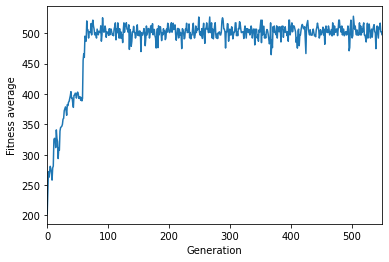

In [29]:
#########################################################
#                                                       #
# MAIN PROGRAM                                          #
#                                                       #
#########################################################
def Q_Hybrid():
    generation=0
    print("============== GENERATION: ",generation," =========================== ")
    print()
    Init_population()
    Show_population()
    Measure(0.5)
    Fitness_evaluation(generation)
    while (generation<generation_max-1):
        print("The best of generation [",generation,"] ", best_chrom[generation])
        print()
        print("============== GENERATION: ",generation+1," =========================== ")
        print()
        rotation()
        crossover(0.75)
        mutation(0.0,0.001)
        generation=generation+1
        Measure(0.5)
        Fitness_evaluation(generation)

print ("""HYBRID GENETIC ALGORITHM""")
input("Press Enter to continue...")
Q_Hybrid()
plot_Output()